# Capstone Project: Capstone Bridge Assistant

### Tianyao YAN, Wenfei YU

As accomplished bridge players, our objective in this project is to offer support to fellow enthusiasts of the game.

Our project encompasses three key initiatives, each addressing different stages of a bridge game: before, during, and after gameplay.

In [1]:
# Import dependencies
import random
from copy import deepcopy
from itertools import combinations
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Before Gameplay: Customizable Dealing Program

Firstly, we aim to develop a customizable dealing program.

Bridge is played with a pack of 52 cards, consisting of 13 cards in each of four suits. The suits rank downward in the order spades (♠), hearts (♥), diamonds (♦), clubs (♣). The Cards of each suit rank downward in the order Ace, King, Queen, Jack, 10, 9, 8, 7, 6, 5, 4, 3, 2.  A card is typically denoted using a combination of its rank and suit, e.g. AS or SA for Ace of Spades, 2D or D2 for Two of Diamonds. Particularly, 10 is often denoted as T for alignment, e.g. TH or HT for Ten of Hearts. Four players play at each table, on which one direction is designated as North and other compass directions assume the normal relationship to North.

In [2]:
# Initialize pack
suits = "SHDC"
ranks = "AKQJT98765432"


class Card:
    """
    A class representing a playing card.

    Attributes:
    - suit (int): The index representing the suit of the card (0-3).
    - rank (int): The index representing the rank of the card (0-12).
    """

    def __init__(self, suit: str, rank: str):
        """
        Initializes a Card object with a given suit and rank.

        Args:
        - suit (str): The suit of the card ('S', 'H', 'D', 'C').
        - rank (str): The rank of the card ('A', 'K', 'Q', ..., '2').
        """
        assert suit in suits, "Invalid suit"
        assert rank in ranks, "Invalid rank"

        self.suit = suits.index(suit)
        self.rank = ranks.index(rank)

    def __lt__(self, other) -> bool:
        """
        Compares two cards to determine if one is less than the other. A card is less
        than another if its suit is less than the other card's suit, or if the suits
        are equal, if its rank is less than the other card's rank.

        Args:
        - self (Card): The first card.
        - other (Card): The second card.

        Returns:
        - bool: True if the first card is less than the second card, False otherwise.
        """
        if self.suit == other.suit:
            return self.rank > other.rank
        else:
            return self.suit > other.suit

    def __eq__(self, other) -> bool:
        """
        Compares two cards to determine if one is equal to the other. Two cards are
        equal if they have the same suit and rank.

        Args:
        - self (Card): The first card.
        - other (Card): The second card.

        Returns:
        - bool: True if the first card is equal to the second card, False otherwise.
        """
        return self.suit == other.suit and self.rank == other.rank

    def __gt__(self, other) -> bool:
        """
        Compares two cards to determine if one is greater than the other. A card is
        greater than another if its suit is greater than the other card's suit, or if
        the suits are equal, if its rank is greater than the other card's rank.

        Args:
        - self (Card): The first card.
        - other (Card): The second card.

        Returns:
        - bool: True if the first card is greater than the second card, False otherwise.
        """
        if self.suit == other.suit:
            return self.rank < other.rank
        else:
            return self.suit < other.suit


pack = [Card(suit, rank) for suit in suits for rank in ranks]
directions = "NESW"


class Hand:
    """
    A class representing a hand of cards in bridge.

    Attributes:
    - cards (list): A list of Card objects representing the hand's cards.
    - direction (str): The direction of the hand ('N', 'E', 'S', 'W').
    - hcp (int): The total high card points (HCP) of the hand.
    - count (dict): A dictionary representing the card count in each suit.
    """

    def __init__(self, direction: str, cards=[]) -> None:
        """
        Initializes a Hand object with a given list of cards and direction.

        Args:
        - cards (list): A list of Card objects representing the hand's cards.
        - direction (str): The direction of the hand ('N', 'E', 'S', 'W').
        """
        assert direction in directions, "Invalid direction"

        self.direction = direction
        self.cards = sorted(deepcopy(cards), reverse=True)
        # Calculate number of cards
        self.num_cards = len(cards)
        # Calculate high card points (HCP)
        self.hcp = sum([max(0, 4 - card.rank) for card in cards])
        # Calculate shape
        self.shape = [0] * 4
        for card in cards:
            self.shape[card.suit] += 1

    def add_card(self, card: Card) -> None:
        """
        Adds a card to the hand.

        Args:
        - self (Hand): The hand to which the card will be added.
        - card (Card): The card to be added to the hand.

        Returns:
        - None
        """
        self.cards.append(card)
        self.num_cards += 1
        self.shape[card.suit] += 1
        if self.num_cards == 13:
            # Finish dealing for this hand
            self.cards.sort(reverse=True)

    def classify(self) -> list[list[Card]]:
        """
        Separates the cards in the hand by suit.

        Args:
        - self (Hand): The hand to be classified.

        Returns:
        - list of lists: A list containing lists of card ranks, separated by suit.
        """
        cards_by_suit = [[] for _ in range(4)]
        for card in self.cards:
            cards_by_suit[card.suit].append(card.rank)

        return cards_by_suit

    def show(self, compact=True) -> None:
        """
        Prints a representation of the hand.

        Args:
        - compact (bool, optional): If True, prints a compact representation of the hand.
            If False, prints a detailed representation with each suit on a new line.
            Defaults to True.
        """
        cards_by_suit = self.classify()
        print("Hand of", self.direction + ":", end=" ")

        if not compact:
            print("\n", end="")

        for i in range(4):
            print(suits[i] + ":", end=" ")
            if not cards_by_suit[i]:
                # Void can be represented by `-`
                print("-", end="")

            for j in cards_by_suit[i]:
                print(ranks[j], end="")

            print(" ", end="") if compact else print("\n", end="")

        if compact:
            print()

    def get_shape(self) -> str:
        """
        Returns the shape of the hand as a string.

        Returns:
        - str: A string representation of the shape of the hand.
        """
        return "-".join(map(str, self.shape))

    def get_hcp(self) -> int:
        """
        Returns the high card points (HCP) of the hand.
        A = 4, K = 3, Q = 2, J = 1, other = 0.

        Returns:
        - int: The high card points of the hand.
        """
        return self.hcp

We show the board after dealing.

In [3]:
def show_board(hands: list[Hand]) -> None:
    """
    Display the bridge board with the hands of all four players.

    Args:
    - hands (tuple): A tuple containing the four Hands in the order of North, East, South, West.
    """

    hand_n, hand_e, hand_s, hand_w = hands

    def show_ns_hand(hand: Hand) -> None:
        """
        Display the hand of either North or South player.

        Args:
        - hand (Hand): The hand to be displayed.
        """
        cards_by_suit = hand.classify()
        for i in range(4):
            print(" " * 16 + suits[i] + ":", end=" ")
            if not cards_by_suit[i]:
                print("-", end="")

            for j in cards_by_suit[i]:
                print(ranks[j], end="")

            print("\n", end="")

    def show_ew_hand(hand_e: Hand, hand_w: Hand):
        """
        Display the hand of both East and West player.

        Args:
        - hand_e (Hand): The hand of the player sitting at the East position.
        - hand_w (Hand): The hand of the player sitting at the West position.
        """
        cards_by_suit_e = hand_e.classify()
        cards_by_suit_w = hand_w.classify()
        for i in range(4):
            print(suits[i] + ":", end=" ")
            if not cards_by_suit_w[i]:
                print("-", end="")

            for j in cards_by_suit_w[i]:
                print(ranks[j], end="")

            print(" " * (14 - len(cards_by_suit_w[i])), end="")
            if not cards_by_suit_w[i]:
                print("\b", end="")

            if i == 0:
                print("\u0331 " * 9, end="")
            elif i == 1:
                print("|   N   |", end="")
            elif i == 2:
                print("|W     E|", end="")
            elif i == 3:
                print("|   S   |", end="")

            print(" " * 4, end="")

            print(suits[i] + ":", end=" ")
            if not cards_by_suit_e[i]:
                print("-", end="")

            for j in cards_by_suit_e[i]:
                print(ranks[j], end="")

            print("\n", end="")

    show_ns_hand(hand_n)
    print()
    show_ew_hand(hand_e, hand_w)
    print(" " * 17 + ("\u0304 ") * 9 + "\n")
    show_ns_hand(hand_s)

Before play starts, each pack is thoroughly shuffled. Then the cards will be uniformly dealt into four hands of 13 cards each.

In [4]:
def deal_basic() -> tuple[Hand]:
    """
    Deal a basic bridge hand to four players.

    Returns:
    - hand_n (Hand): The hand of the player sitting at the North position.
    - hand_e (Hand): The hand of the player sitting at the East position.
    - hand_s (Hand): The hand of the player sitting at the South position.
    - hand_w (Hand): The hand of the player sitting at the West position.
    """
    random.shuffle(pack)
    return (
        Hand("N", pack[:13]),
        Hand("E", pack[13:26]),
        Hand("S", pack[26:39]),
        Hand("W", pack[39:]),
    )

In [5]:
# Testcases
hand = deal_basic()[0]
hand.show()
hand.get_hcp()

Hand of N: S: AT82 H: QJ87 D: 94 C: 843 


7

In [6]:
hand = deal_basic()[1]
hand.show(False)
hand.get_shape()

Hand of E: 
S: QJ986
H: 643
D: A
C: J854


'5-3-1-4'

In [7]:
show_board(deal_basic())

                S: 8
                H: 9543
                D: AQ98532
                C: 3

S: KT953         ̱ ̱ ̱ ̱ ̱ ̱ ̱ ̱ ̱     S: AJ64
H: KJ762         |   N   |    H: T
D: K             |W     E|    D: J764
C: 97            |   S   |    C: A542
                 ̄ ̄ ̄ ̄ ̄ ̄ ̄ ̄ ̄ 

                S: Q72
                H: AQ8
                D: T
                C: KQJT86


In certain situations, such as during training exercises, there may be a need to allocate hands based on particular criteria. However, when the objective is to assign two or more hands to achieve a training goal, it is preferable for an individual to create a customized board rather than relying on a dealing program. Therefore, our focus is solely on devising a method to generate random hands while adhering to these specific constraints.

We may assign a hand of specific length (range) of a suit to a player.

In [8]:
def deal_exact_suit_length(
    direction: str, spade=-1, heart=-1, diamond=-1, club=-1
) -> Hand:
    """
    Deal a bridge hand to a players with specific suit length(s).

    Args:
    - direction (str): The direction of the player ('N', 'E', 'S', 'W').
    - spade (int): The required length of the spade suit.
    - heart (int): The required length of the heart suit.
    - diamond (int): The required length of the diamond suit.
    - club (int): The required length of the club suit.
    """
    assert direction in directions

    requirements = [spade, heart, diamond, club]
    assert sum(0 <= x <= 13 for x in requirements) <= 13, "Invalid suit length"

    hand = Hand(direction)
    remaining_cards = []
    for i in range(4):
        if requirements[i] < 0:
            # No restriction on suit length
            # Add all cards of the suit to the remaining cards
            remaining_cards += [Card(suits[i], rank) for rank in ranks]
        else:
            # Randomly select the required number of cards of the suit
            suit_ranks = random.sample(ranks, requirements[i])
            for rank in suit_ranks:
                hand.add_card(Card(suits[i], rank))

    random.shuffle(remaining_cards)
    remaining_num_cards = 13 - hand.num_cards
    # Deal the remaining cards to the hand
    for i in range(remaining_num_cards):
        hand.add_card(remaining_cards[i])

    return hand


def deal_range_suit_length(direction: str, suit: str, low: int, high: int) -> Hand:
    """
    Deal a bridge hand to a player with a range of suit lengths.

    Args:
    - direction (str): The direction of the player ('N', 'E', 'S', 'W').
    - suit (str): The suit of the required range ('S', 'H', 'D', 'C').
    - low (int): The lower bound (including) of the range.
    - high (int): The upper bound (including) of the range.
    """
    assert direction in directions
    assert suit in suits
    assert 0 <= low <= high <= 13

    length = random.randint(low, high)
    if suit == "S":
        hand = deal_exact_suit_length(direction, spade=length)
    elif suit == "H":
        hand = deal_exact_suit_length(direction, heart=length)
    elif suit == "D":
        hand = deal_exact_suit_length(direction, diamond=length)
    else:
        hand = deal_exact_suit_length(direction, club=length)

    return hand

We may assign a hand with a specific card to a player as well.

In [9]:
def deal_specific_card(direction: str, cards: list[str]) -> Hand:
    """
    Deal a bridge hand to a player with specific cards.

    Args:
    - direction (str): The direction of the player ('N', 'E', 'S', 'W').
    - cards (list): A list of strings representing the cards to be dealt.
    """
    assert direction in directions, "Invalid direction"
    assert (card[0] in suits and card[1] in ranks for card in cards), "Invalid card"

    hand = Hand(direction)
    remaining_cards = deepcopy(pack)
    for card in cards:
        # Add the specific card to the hand
        hand.add_card(Card(card[0], card[1]))

        # Remove the specific card from the remaining cards
        remaining_cards.remove(Card(card[0], card[1]))

    random.shuffle(remaining_cards)
    remaining_num_cards = 13 - hand.num_cards
    # Deal the remaining cards to the hand
    for i in range(remaining_num_cards):
        hand.add_card(remaining_cards[i])

    return hand

Then we can add constraints and proceed to deal.

In [10]:
def deal_with_one_hand(hand: Hand) -> list[Hand]:
    """
    Deal remaining cards to the other 3 players.

    Args:
    - hand (Hand): The initial hand to deal with.

    Returns:
    - List[Hand]: List containing four hands after dealing.
    """
    # Remaining cards to deal to the other 3 players
    remaining_cards = [
        Card(suit, rank)
        for suit in suits
        for rank in ranks
        if Card(suit, rank) not in hand.cards
    ]

    # Initialize hands with the given hand
    hands = [None] * 4
    hands[directions.index(hand.direction)] = hand
    direction_list = list(directions)
    direction_list.remove(hand.direction)

    # Deal the remaining cards to the other 3 players
    random.shuffle(remaining_cards)
    for i in range(3):
        hands[directions.index(direction_list[i])] = Hand(
            direction_list[i], remaining_cards[i * 13 : (i + 1) * 13]
        )

    return hands

In [11]:
# Testcases
deal_exact_suit_length("W", 4, 5, 2, 2).show(False)

Hand of W: 
S: T754
H: AJ743
D: T4
C: 75


In [12]:
deal_range_suit_length("E", "H", 4, 6).show(False)

Hand of E: 
S: AJ84
H: KQT4
D: KQ8
C: 97


In [13]:
deal_specific_card("N", ["SA", "HK", "D4", "C7"]).show(False)

Hand of N: 
S: A7
H: AK9542
D: T643
C: 7


In [14]:
show_board(deal_with_one_hand(deal_exact_suit_length("W", 2, 5, 0, 6)))

                S: AKJ7
                H: QT84
                D: J64
                C: KJ

S: 62            ̱ ̱ ̱ ̱ ̱ ̱ ̱ ̱ ̱     S: Q95
H: 97652         |   N   |    H: K3
D: -             |W     E|    D: T972
C: AT7653        |   S   |    C: Q942
                 ̄ ̄ ̄ ̄ ̄ ̄ ̄ ̄ ̄ 

                S: T843
                H: AJ
                D: AKQ853
                C: 8


## During Gameplay: Suit Distribution Probability Analysis

Players are often considering how the cards in a particular suit are divided among the players and how this distribution may impact their chances of success in the hand. Understanding the distribution of the suits is an essential skill for bridge players, as it helps them make informed decisions about playing. 

The four players at each table constitute two partnerships or sides, North-South against East-West. During the gameplay, the hand of one player is visible to all players. This player is referred to as "dummy". Therefore, a non-dummy player can infer the possible hands of the other two players based on his own hand and dummy's hand.

Players may evaluate the probability of the "location" of some specific (high) card(s).

In [15]:
def high_card_distribution_sample_once(unknown_high_cards: str) -> list:
    """
    Generates a single sample of high card distribution.

    Args:
    - unknown_high_cards (list): A list of the cards that are unknown.
    - directions (str): A string containing the 2 directions for distribution.

    Returns:
    - dict: A dictionary containing the distribution of high cards for each direction.
    """
    # Generate a random sample of high card distribution
    s = np.random.binomial(1, 0.5, size=len(unknown_high_cards))
    distribution = [[], []]

    # Assign high cards to each direction based on the sample
    for i in range(len(unknown_high_cards)):
        distribution[s[i]].append(unknown_high_cards[i])

    return distribution


def high_card_distribution_sample(
    unknown_high_cards: str, directions: str, direction: str, num_samples=10000
) -> None:
    """
    Generates multiple samples of high card distribution and plots a histogram.

    Args:
    - unknown_high_cards (list): A list of the cards that are unknown.
    - directions (str): A string containing the 2 directions for distribution.
    - direction (str): The direction for which the distribution is to be plotted.
    - num_samples (int, optional): Number of samples to generate. Defaults to 1000.
    """
    assert direction in directions
    # Generate bin for histogram, containing all possible combinations of high cards
    bin = []
    for i in range(len(unknown_high_cards) + 1):
        bin.extend(
            [
                "".join(combination)
                for combination in combinations(unknown_high_cards, i)
            ]
        )

    bin.sort()

    # Generate samples of high card distribution
    direction_index = directions.index(direction)
    samples = []
    for _ in range(num_samples):
        sample = high_card_distribution_sample_once(unknown_high_cards)
        samples.append(bin.index("".join(sample[direction_index])))

    # Plot histogram of the samples
    height, _ = np.histogram(
        sorted(samples), bins=range(len(unknown_high_cards) ** 2 + 1)
    )
    plt.title(f"High cards held by {directions[0]}")
    plt.bar(range(len(unknown_high_cards) ** 2), height)
    plt.xticks(range(len(unknown_high_cards) ** 2), bin)
    plt.show()

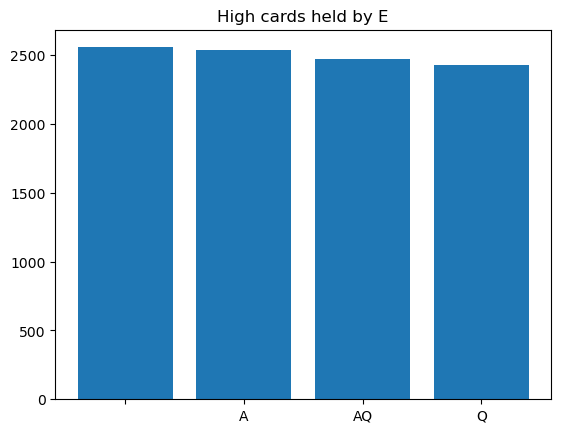

In [16]:
# Testcases
high_card_distribution_sample("AQ", "EW", "E")

By using the functions mentioned earlier, we found that when there are no constraints, the likelihood of each high card in a particular direction is 50%, and they are almost not dependent on each other. While the 13-card limit was not taken into account, it serves as a practical approximation during gameplay.

In [17]:
def high_card_distribution_calculator(
    unknown_high_cards: str, wanted: str, specific=True
) -> float:
    """
    Calculate the probability of distributing unknown high cards based on given parameters.

    Args:
    - unknown_high_cards (str): String of unknown high cards.
    - wanted (str): String of high cards wanted to be placed in directions[0].
    - specific (bool, optional): If True, calculates the probability considering all unknown_high_cards.
                                 If False, calculates the probability considering only the wanted cards.

    Returns:
    - float: The calculated probability.
    """
    if specific:
        return 1 / (2 ** len(unknown_high_cards))
    else:
        return 1 / (2 ** len(wanted))

In [18]:
# Testcases
high_card_distribution_calculator("AQ", "Q")

0.25

In [19]:
high_card_distribution_calculator("KJ", "J", False)

0.5

Players should consider the condition if they know the exact number of cards in that suit across four hands.

In [20]:
def high_card_conditional_distribution_sample_once(
    unknown_high_cards: str, distribution: tuple, directions: str
) -> list:
    """
    Generate a sample from a high card conditional distribution once.

    Args:
    - unknown_high_cards (str): String representing unknown high cards.
    - distribution (tuple): Tuple containing the distribution of cards.
    - directions (str): String representing directions for players.

    Returns:
    - dict: A dictionary containing the sampled cards for each player.
    """
    unknown = list(unknown_high_cards)

    # Generate a random distribution of unknown cards
    unknown.extend(["x"] * (sum(distribution) - len(unknown)))
    random.shuffle(unknown)

    # Extract cards for player 1
    c1 = sorted(
        [
            unknown_high_cards.index(card)
            for card in unknown[: distribution[0]]
            if card in unknown_high_cards
        ]
    )
    cards_1 = "".join(unknown_high_cards[c] for c in c1)

    # Extract cards for player 2
    c2 = sorted(
        [
            unknown_high_cards.index(card)
            for card in unknown[distribution[0] :]
            if card in unknown_high_cards
        ]
    )
    cards_2 = "".join(unknown_high_cards[c] for c in c2)

    return [cards_1, cards_2]


def high_card_conditional_distribution_sample(
    unknown_high_cards: str, distribution: tuple, directions: str, num_samples=10000
) -> list:
    """
    Generate samples and plot histograms of high cards held by players.

    Args:
    - unknown_high_cards (str): String representing the unknown high cards.
    - distribution (tuple): Tuple representing the distribution of high cards.
    - directions (str): String representing the directions of players.
    - num_samples (int): Number of samples to generate (default is 10000).

    Returns:
    - None
    """

    def plot_histogram(samples, direction):
        """
        Plot histogram of high cards held by players.

        Args:
        - samples (list): List of samples.
        - direction (str): Direction of the player.
        """
        height, _ = np.histogram(
            sorted(samples), bins=range(len(unknown_high_cards) ** 2 + 1)
        )
        bar_range = range(len(unknown_high_cards) ** 2)
        plt.title(f"High cards held by {direction}")
        plt.bar(bar_range, height)
        plt.xticks(bar_range, bin)
        plt.show()

    samples_1 = []
    samples_2 = []
    bin = []

    # Generate bin for histogram, containing all possible combinations of high cards
    for i in range(len(unknown_high_cards) + 1):
        bin.extend(
            [
                "".join(combination)
                for combination in combinations(unknown_high_cards, i)
            ]
        )

    bin.sort(key=lambda x: (len(x), x))

    # Generate samples
    for _ in range(num_samples):
        sample = high_card_conditional_distribution_sample_once(
            unknown_high_cards, distribution, directions
        )
        samples_1.append(bin.index("".join(sample[0])))
        samples_2.append(bin.index("".join(sample[1])))

    # Plot histograms
    plot_histogram(samples_1, directions[0])
    plot_histogram(samples_2, directions[1])

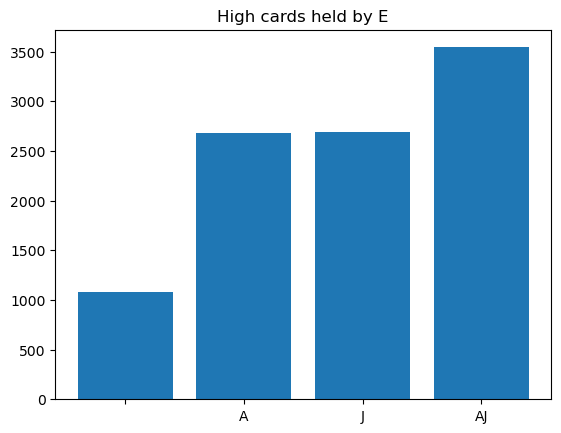

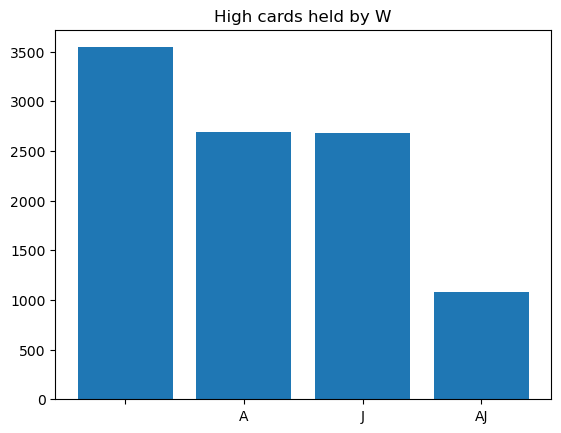

In [21]:
# Testcases
high_card_conditional_distribution_sample("AJ", (5, 3), "EW")

Using previously defined functions, we determined that the probability of a distribution scenario involves one player holding $i$ cards in a specific suit, with $j$ of those cards being among $n$ designated high cards, while the other player holds $k$ cards in the same suit, including the remaining $n-j$ designated high cards, is $$\frac{C(i,j)\cdot C(k,n-j)}{C(n,j)\cdot C(i+k,n)}$$

In [22]:
def high_card_conditional_distribution_calculator(
    unknown_high_cards: list, distribution: tuple, directions: str
) -> float:
    # Generate bin for histogram, containing all possible combinations of high cards
    bin = []
    for i in range(len(unknown_high_cards) + 1):
        bin.extend(
            [
                "".join(combination)
                for combination in combinations(unknown_high_cards, i)
            ]
        )

    bin.sort()

    # Calculate the probability of each distribution
    total = sum(distribution)
    for card in bin:
        print(
            directions[0],
            "holds",
            card,
            "with probability %.5f"
            % (
                math.comb(distribution[0], len(card))
                * math.comb(distribution[1], len(unknown_high_cards) - len(card))
                / (
                    math.comb(len(unknown_high_cards), len(card))
                    * math.comb(total, len(unknown_high_cards))
                )
            ),
        )

In [23]:
# Testcases
high_card_conditional_distribution_calculator("QJ", (5, 3), "EW")

E holds  with probability 0.10714
E holds J with probability 0.26786
E holds Q with probability 0.26786
E holds QJ with probability 0.35714


Players may also evaluate the probability of each kind of distribution of cards held by each opponent in a particular suit by considering the total number of cards held by himself and his partner. For instance, if South and dummy (North, for instance) have 9 spades in total, the distribution of spades held by their opponents could be 4-0, suggesting that one of their opponents holds all the remaining spades, or it could be 3-1, or 2-2.

In [24]:
def length_distribution_sample_once(num_unknown: int) -> tuple:
    """
    Generate a single sample of length distribution.

    Args:
    - num_unknown (int): Number of unknown cards.

    Returns:
    - tuple: A tuple containing the counts of cards with lengths less than or equal to 13 and greater than 13, respectively.
    """
    # Initialize the cards with 1 for wanted unknown cards
    cards = [1 for _ in range(num_unknown)]

    # Ensure there are exactly 26 cards (13 for each direction)
    while len(cards) < 26:
        cards.append(0)

    # Shuffle the cards
    random.shuffle(cards)

    # Count the number of cards held by each direction
    return (sum(cards[:13]), sum(cards[13:]))


def t2s(t: tuple) -> str:
    """
    Convert tuple to a string representation.

    Args:
    - t (tuple): Input tuple.

    Returns:
    - str: String representation of the tuple in the format 'x-y'.
    """
    return str(t[0]) + "-" + str(t[1])


def length_distribution_sample(num_unknown: int, num_samples=10000) -> None:
    """
    Generate length distribution samples and plot a histogram.

    Args:
    - num_unknown (int): Number of unknown cards.
    """
    # Generate samples
    samples = [
        length_distribution_sample_once(num_unknown)[0] for _ in range(num_samples)
    ]

    # Generate bin for histogram, containing all possible combinations of lengths
    bin = [t2s((i, num_unknown - i)) for i in range(num_unknown + 1)]

    # Plot histogram of the samples
    height, _ = np.histogram(sorted(samples), bins=range(num_unknown + 2))
    plt.bar(range(num_unknown + 1), height)
    plt.xticks(range(num_unknown + 1), bin)
    plt.show()

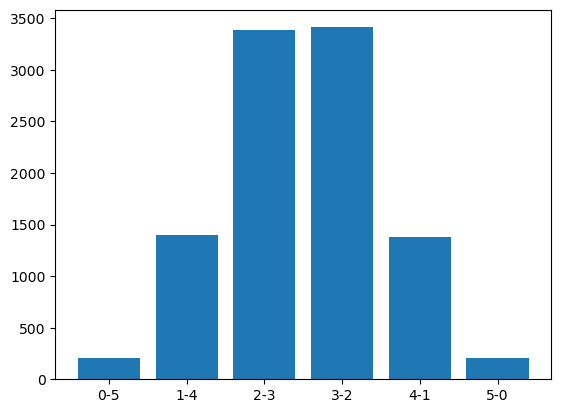

In [25]:
# Testcases
length_distribution_sample(5)

Utilizing these functions, we determined the probability that one player holds $i$ cards while the other holds $j$ cards in a suit to be $$\frac{C(13,i)\cdot C(13,j)}{C(26,i+j)}$$

In [26]:
def length_distribution_calculator(num_unknown: int, specific=True) -> None:
    """
    Calculate the length distribution probabilities.

    Args:
    - num_unknown (int): Number of unknown cards.
    - specific (bool, optional): If True, calculate specific counts for each possible combination of lengths.
                                 If False, calculate only half of the possible combinations and double their probabilities.
                                 Defaults to True.
    """
    if specific:
        # Calculate probabilities for specific counts
        for i in range(num_unknown + 1):
            print(
                str(i) + "-" + str(num_unknown - i),
                "{:.5f}".format(
                    math.comb(13, i)
                    * math.comb(13, num_unknown - i)
                    / math.comb(26, num_unknown)
                ),
            )
    else:
        # Calculate probabilities for general combinations
        for i in range(math.ceil(num_unknown / 2)):
            print(
                str(num_unknown - i) + "-" + str(i),
                "{:.5f}".format(
                    math.comb(13, i)
                    * math.comb(13, num_unknown - i)
                    * 2
                    / math.comb(26, num_unknown)
                ),
            )

        # If num_unknown is even, calculate probability for the central count
        if num_unknown % 2 == 0:
            print(
                str(num_unknown // 2) + "-" + str(num_unknown // 2),
                "{:.5f}".format(
                    math.comb(13, num_unknown // 2)
                    * math.comb(13, num_unknown // 2)
                    / math.comb(26, num_unknown)
                ),
            )

In [27]:
# Testcases
print("Specific:")
length_distribution_calculator(6)
print("General:")
length_distribution_calculator(6, False)

Specific:
0-6 0.00745
1-5 0.07267
2-4 0.24224
3-3 0.35528
4-2 0.24224
5-1 0.07267
6-0 0.00745
General:
6-0 0.01491
5-1 0.14534
4-2 0.48447
3-3 0.35528


Players should consider the impact if an opponent in some way reveals significant length in another suit.

In [28]:
def length_conditional_distribution_sample_once(
    num_unknown: int, num_other_known: tuple
) -> tuple:
    """
    Generate a single sample from the conditional distribution of lengths.

    Args:
    - num_unknown (int): Number of unknown cards.
    - num_other_known (tuple): Number of known cards in the other suits in the 2 other directions.

    Returns:
    - tuple: A tuple containing the counts of cards in the first and second halves.
    """
    # Initialize the cards with 1 for wanted unknown cards
    cards = [1 for _ in range(num_unknown)]

    # Ensure there are exactly 26 cards (13 for each direction)
    while len(cards) < 26 - num_other_known[0] - num_other_known[1]:
        cards.append(0)

    # Shuffle the cards
    random.shuffle(cards)

    # Count the number of cards held by each direction
    return (
        sum(cards[: 13 - num_other_known[0]]),
        sum(cards[13 - num_other_known[0] :]),
    )


def length_conditional_distribution_sample(
    num_unknown: int, num_other_known: tuple, num_samples=10000
) -> None:
    """
    Generate multiple samples from the conditional distribution of lengths and visualize the distribution.

    Args:
    - num_unknown (int): Number of unknown cards.
    - num_other_known (tuple): Number of known cards in the other suits in the 2 other directions.
    """
    # Generate samples.
    samples = [
        t2s(length_conditional_distribution_sample_once(num_unknown, num_other_known))
        for _ in range(num_samples)
    ]

    # Generate bin for histogram, containing all possible combinations of lengths
    bin = []
    for j in range(num_unknown + 1):
        bin.append(t2s((j, num_unknown - j)))

    # Plot histogram of the samples
    height, _ = np.histogram(sorted(samples), bins=range(num_unknown + 2))
    plt.bar(range(num_unknown + 1), height)
    plt.xticks(range(num_unknown + 1), bin)
    plt.show()

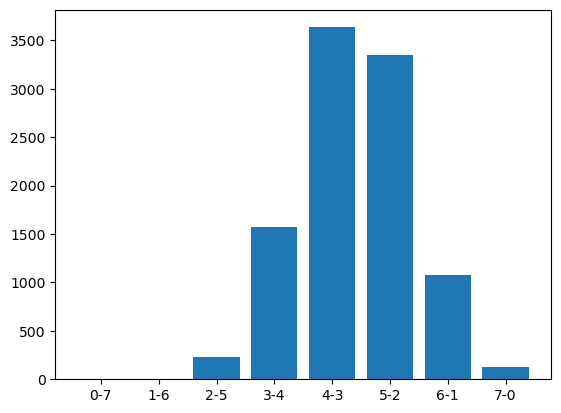

In [29]:
# Testcases
length_conditional_distribution_sample(7, (3, 7))

Similarly, by employing these functions, we determined that in a particular suit, the probability of one player possessing $i$ cards while simultaneously holding $k$ cards in different suits, while the other player holds the remaining $j$ cards while simultaneously holding $l$ cards in different suits, is $$\frac{C(13-k,i)\cdot C(13-l,j)}{C(26-k-l,i+j)}$$

In [30]:
def length_conditional_distribution_calculator(
    num_unknown: int, num_other_known: int
) -> float:
    for i in range(num_unknown + 1):
        print(
            str(i) + "-" + str(num_unknown - i),
            "{:.5f}".format(
                math.comb(13 - num_other_known[0], i)
                * math.comb(13 - num_other_known[1], num_unknown - i)
                / math.comb(26 - num_other_known[0] - num_other_known[1], num_unknown)
            ),
        )

In [31]:
# Testcases
length_conditional_distribution_calculator(7, (3, 7))

0-7 0.00000
1-6 0.00087
2-5 0.02360
3-4 0.15734
4-3 0.36713
5-2 0.33042
6-1 0.11014
7-0 0.01049


## After Gameplay: Butler Calculation and Ranking

After gameplay, assessing player performance may be necessary for coaches. One method to evaluate performance is by utilizing a butler.

Tournament organizers may find it necessary to rank players. One approach is to use Butler, also known as IMP ranking, while another is employing victory points (VP).

Butler is a quantitative analysis of tournament data to assess players' skill levels, incorporating metrics such as scoring rates and trick-taking efficiency, to evaluate performance post-game. Butler takes into account the performance of all pairs on a given board and then assigns scores accordingly.

The scores from [an actual tournament](http://www.gembridge.cn/score/PairBoards?tourStart=2023-08-25&tour=23721&event=80628966-bc59-4fab-8947-61033b091aae&section=9092c949-e68d-445c-8b24-e0b0a44a938d&board=1&from=ccba) have been stored into `score.csv`.

In [32]:
# Open the file and read scores
with open("score.csv") as score_file:
    score_file.readline()  # Skip header
    scores = [
        list(map(int, score.strip().split(","))) for score in score_file.readlines()
    ]

display(
    pd.DataFrame(
        scores, columns=["board", "table", "pair_ns", "pair_ew,", "score"]
    ).set_index("board")
)

,table,pair_ns,"pair_ew,",score
board,,,,
1,2,11,2,100
1,1,12,1,90
1,3,3,10,50
1,4,9,4,-110
1,6,7,6,-120
...,...,...,...,...
44,4,8,3,-140
44,5,7,4,-140
44,3,2,9,-150


Each board's score is an integer multiple of 10. The sign indicates which team receives the score: a positive sign indicates that North-South (N-S) earns the score, while a negative sign indicates that East-West (E-W) earns the score. After getting the scores of all boards on all tables, we should first compute the "datum" of each board. A "datum" or mean score can be computed from the set of the scores after discarding the top (max) and bottom (min) scores, and retaining the rest. $$\textbf{datum}=\frac{\sum_{\text{tables}}\text{score}-\max(\text{scores})-\min(\text{scores})}{|\text{tables}|-2}$$ Then the average of all of the retained scores is calculated, and rounded to the nearest 10 points. We save the datum of each board in `datum.csv` with two columns: "board number" and "datum".

In [33]:
# Populate board scores
board_scores = [[] for _ in range(max(score[0] for score in scores) + 1)]
for score in scores:
    board_scores[score[0]].append(score[4])

# Calculate datum for each board
data = [
    (
        int(round((sum(board) - max(board) - min(board)) / (len(board) - 2) / 10) * 10)
        if board
        else 0
    )
    for board in board_scores
]

display(
    pd.DataFrame(
        [[board_num, data[board_num]] for board_num in range(1, len(board_scores))],
        columns=["board", "datum"],
    ).set_index("board")
)

,datum
board,
1,-20
2,-360
3,-320
4,40
5,-420
6,370
7,-250
8,40
9,0


In [34]:
# Write datum to csv
with open("datum.csv", "w") as datum_file:
    datum_file.write("board,datum\n")
    for i in range(1, len(data)):
        datum_file.write(f"{i},{data[i]}\n")

For each pair (including those pairs whose scores were discarded from the datum calculation), the score for their board is taken and subtracted from the datum score. This score, positive or negative, is converted to IMPs (International Match Points) according to the IMP table stored in `imp.csv`. If the difference reaches the number in the "difference" column, they can obtain the corresponding Butler in the "IMP" column. Each of the pairs then scores that number of IMPs for the board. In general, for any table, one pair gets the positive score and the other the negative score, or both pairs get 0.

In [35]:
# Read imp from csv
with open("imp.csv") as imp_file:
    imp_file.readline()  # Skip header
    imps = [list(map(int, imp.strip().split(","))) for imp in imp_file.readlines()]

display(pd.DataFrame(imps, columns=["difference", "imp"]).set_index("difference"))

,imp
difference,
0,0
20,1
50,2
90,3
130,4
170,5
220,6
270,7
320,8


To determine the butler score, we must convert the discrepancy between the score and datum into its equivalent IMP score.

In [36]:
def diff2imp(diff: int) -> int:
    """
    Convert the difference of the score and datum to its corresponding IMP score.
    The sign of the difference is preserved in the IMP score.

    Args:
    - diff (int): The difference of scores to be converted.

    Returns:
    - int: The IMP score corresponding to the given difference.
    """
    sign = 0 if diff == 0 else diff // abs(diff)
    return next((imp[1] - 1 for imp in imps if abs(diff) < imp[0]), 24) * sign

In [37]:
# Testcases
diff2imp(280)

7

In [38]:
diff2imp(-750)

-13

In [39]:
diff2imp(0)

0

In [40]:
# Calculate Butler of each board
scores_with_butler = [
    score
    + [data[score[0]], score[4] - data[score[0]], diff2imp(score[4] - data[score[0]])]
    for score in scores
]

display(
    pd.DataFrame(
        scores_with_butler,
        columns=[
            "board",
            "table",
            "pair_ns",
            "pair_ew",
            "score",
            "datum",
            "difference",
            "butler",
        ],
    ).set_index("board")
)

,table,pair_ns,pair_ew,score,datum,difference,butler
board,,,,,,,
1,2,11,2,100,-20,120,3
1,1,12,1,90,-20,110,3
1,3,3,10,50,-20,70,2
1,4,9,4,-110,-20,-90,-3
1,6,7,6,-120,-20,-100,-3
...,...,...,...,...,...,...,...
44,4,8,3,-140,-140,0,0
44,5,7,4,-140,-140,0,0
44,3,2,9,-150,-140,-10,0


To determine a pair's final Butler, take the sum of their Butlers from all boards. A higher Butler indicates better performance by the pair. We save the final Butler to `butler.csv` in decrease order with two columns: "pair number" and "butler".

In [41]:
# Calculate overall Butler
num_pairs = max(max(score[2], score[3]) for score in scores)
butlers_by_pair = [[[] for _ in range(num_pairs + 1)] for _ in range(num_pairs + 1)]
for score in scores_with_butler:
    # N-S pair gets positive Butler
    butlers_by_pair[score[2]][score[3]].append(score[7])
    # E-W pair gets negative Butler
    butlers_by_pair[score[3]][score[2]].append(-score[7])

# Calculate overall Butler for each pair
butlers = [
    sum(sum(butlers_by_pair[pair_num][i]) for i in range(num_pairs + 1))
    for pair_num in range(num_pairs + 1)
]
# Sort pairs by Butler score
butlers_by_rank = sorted(
    [[pair_num, butlers[pair_num]] for pair_num in range(1, len(butlers))],
    key=lambda x: x[1],
    reverse=True,
)
butlers_by_rank = [[i + 1] + butlers_by_rank[i] for i in range(len(butlers_by_rank))]

display(
    pd.DataFrame(butlers_by_rank, columns=["rank", "pair", "butler"]).set_index("rank")
)

,pair,butler
rank,,
1,4,52
2,7,45
3,9,11
4,6,1
5,8,-2
6,12,-2
7,5,-7
8,1,-9
9,11,-15


In [42]:
# Write butler rank to csv
with open("butler.csv", "w") as butler_file:
    butler_file.write("rank,pair,butler\n")
    for i in range(len(butlers_by_rank)):
        butler_file.write(f"{i + 1},{butlers_by_rank[i][1]},{butlers_by_rank[i][2]}\n")

To calculate the victory points, we then transform the IMP scores using the specified function $$\tau=\frac{\sqrt{5}-1}{2}$$ $$\textbf{VP}=10+\text{sign}(M)\cdot10\cdot\frac{1-\tau^{\min\left(3,\frac{|M|}{5\sqrt{N}}\right)}}{1-\tau^3}$$ where $M$ represents the input IMP score and $N$ denotes the number of boards played in a round against the same opponent.

In [43]:
def imp2vp(imp: int, num_boards: int) -> float:
    """
    Convert the IMP score to the corresponding victory points.

    Args:
    - imp (int): The IMP score to be converted.

    Returns:
    - float: The victory points corresponding to the given IMP score.
    """
    sign = 0 if imp == 0 else imp // abs(imp)
    golden_ratio = (math.sqrt(5) - 1) / 2
    return round(
        10
        + sign
        * 10
        * (1 - golden_ratio ** min(abs(imp) / (5 * math.sqrt(num_boards)), 3))
        / (1 - golden_ratio ** 3),
        2,
    )

In [44]:
# Testcases
imp2vp(12, 16)

13.28

In [45]:
imp2vp(-45, 8)

0.0

In [46]:
imp2vp(0, 12)

10.0

To determine a pair's rank, take the sum of their vps from all rounds. A higher VP indicates better performance by the pair. We save the final Butler to `vp.csv` in decrease order with two columns: "pair number" and "vp".

In [47]:
# Calculate VP for each pair
vps_by_pair = [[0 for _ in range(num_pairs + 1)] for _ in range(num_pairs + 1)]
for i in range(1, num_pairs + 1):
    for j in range(1, num_pairs + 1):
        if butlers_by_pair[i][j]:
            vps_by_pair[i][j] = imp2vp(
                sum(butlers_by_pair[i][j]), len(butlers_by_pair[i][j])
            )

# Calculate total VP for each pair
vps = [sum(vps_by_pair[pair_num]) for pair_num in range(len(vps_by_pair))]
# Sort pairs by VP
vps_by_rank = sorted(
    [[pair_num, vps[pair_num]] for pair_num in range(1, len(vps))],
    key=lambda x: x[1],
    reverse=True,
)
vps_by_rank = [[i + 1] + vps_by_rank[i] for i in range(len(vps_by_rank))]

display(pd.DataFrame(vps_by_rank, columns=["rank", "pair", "vp"]).set_index("rank"))

,pair,vp
rank,,
1,7,131.42
2,4,130.40
3,9,113.71
4,6,111.55
5,12,109.98
6,8,109.93
7,1,107.68
8,5,104.19
9,11,102.83


In [48]:
# Write VP rank to csv
with open("vp.csv", "w") as vp_file:
    vp_file.write("rank,pair,vp\n")
    for i in range(len(butlers_by_rank)):
        vp_file.write(f"{i + 1},{vps_by_rank[i][1]},{vps_by_rank[i][2]}\n")

The actual ranking of the tournament is stored in `rank.csv`. In this tournament, pairs are actually ranked based on their overall Match Points (MP), another ranking method, that reveal the percentage of opposing pairs they can defeat in the same direction on each board. Compare the ranking based on Butler and VP with the actual ranking based on MP.

In [49]:
# Read actual rank from csv
with open("rank.csv") as rank_file:
    rank_file.readline()  # Skip header
    actual_ranks = [
        list(map(int, rank.strip().split(","))) for rank in rank_file.readlines()
    ]

display(pd.DataFrame(actual_ranks, columns=["rank", "pair"]).set_index("rank"))

,pair
rank,
1,4
2,12
3,7
4,11
5,6
6,5
7,9
8,1
9,8


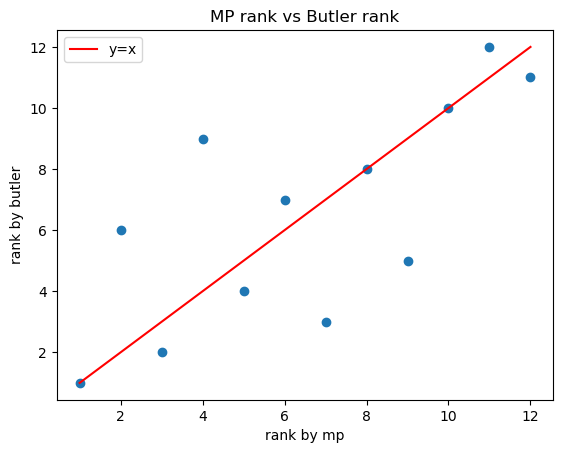

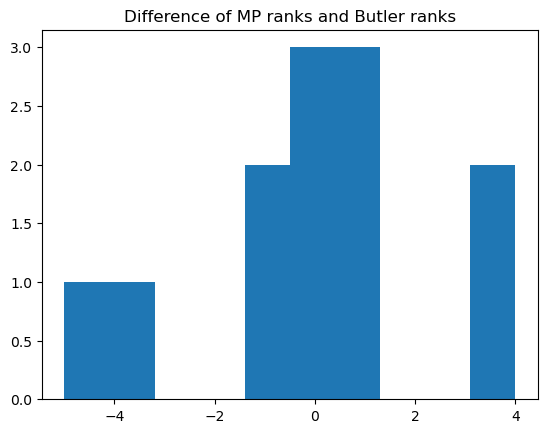

In [50]:
# Compare MP ranks and Butler ranks using scatter plot
rank_by_butler = sorted(butlers_by_rank, key=lambda x: x[1])
rank_by_mp = sorted(actual_ranks, key=lambda x: x[1])

plt.title("MP rank vs Butler rank")
plt.xlabel("rank by mp")
plt.ylabel("rank by butler")
x = np.linspace(1, 12, 1000)
plt.plot(x, x, c="r", label="y=x")
plt.legend()
plt.scatter([rank[0] for rank in rank_by_mp], [rank[0] for rank in rank_by_butler])
plt.show()

# Compare MP ranks and Butler ranks using histogram
plt.title("Difference of MP ranks and Butler ranks")
plt.hist(
    np.array([rank[0] for rank in rank_by_mp])
    - np.array([rank[0] for rank in rank_by_butler])
)
plt.show()

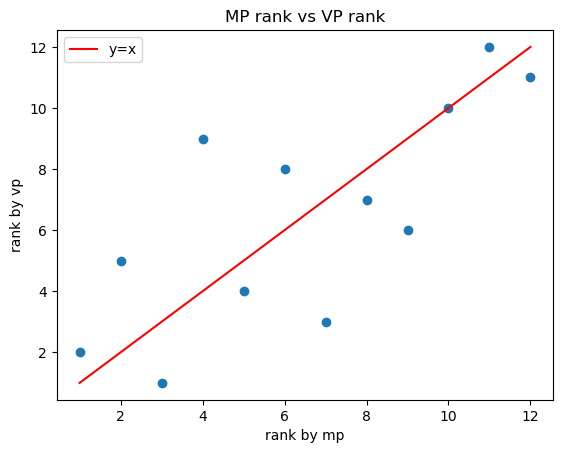

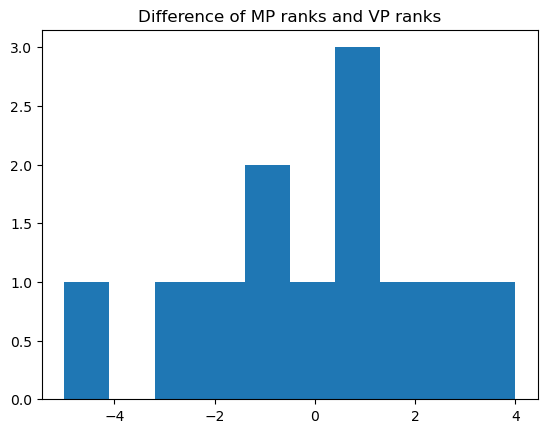

In [51]:
# Compare MP ranks and VP ranks using scatter plot
rank_by_vp = sorted(vps_by_rank, key=lambda x: x[1])
plt.title("MP rank vs VP rank")
plt.xlabel("rank by mp")
plt.ylabel("rank by vp")
x = np.linspace(1, 12, 1000)
plt.plot(x, x, c="r", label="y=x")
plt.legend()
plt.scatter([rank[0] for rank in rank_by_mp], [rank[0] for rank in rank_by_vp])
plt.show()

# Compare MP ranks and VP ranks using histogram
plt.title("Difference of MP ranks and VP ranks")
plt.hist(
    np.array([rank[0] for rank in rank_by_mp])
    - np.array([rank[0] for rank in rank_by_vp])
)
plt.show()

Based on the plots provided, we infer a positive correlation between the rankings of Butler and VP with the rankings of the players in the tournament. Tournament organizers have the flexibility to select a ranking method that precisely aligns with their particular requirements.

## Summary

In conclusion, our project serves as a testament to the power of computational methods in enhancing our understanding and enjoyment of traditional card games like Bridge. It provides players with valuable insights and tools to improve their gameplay, and offers a new perspective on evaluating performance.